# May 29, 2024: kmeans communities of the functional connectivity matrix

In [1]:
import numpy as np 
from sklearn.cluster import KMeans

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

import cmasher as cmr  # CITE ITS PAPER IN YOUR MANUSCRIPT

# ignore user warnings
import warnings
warnings.filterwarnings("ignore") #, category=UserWarning)

In [2]:
class ARGS():
    pass

args = ARGS()

args.SEED = 100

<Axes: >

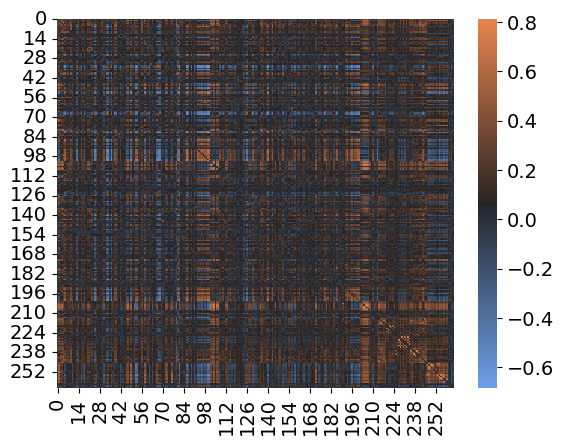

In [3]:
W = np.loadtxt('corr_mtrx.txt')
sns.heatmap(W, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))

In [4]:
args.num_rois = W.shape[0]
args.num_comms = 7
kmeans = KMeans(
    n_clusters=args.num_comms,
    init='k-means++', n_init=50,
    random_state=args.SEED,
).fit(W)
c = kmeans.predict(W)
comms = np.zeros((args.num_rois, args.num_comms))
for comm in range(args.num_comms):
    comms[:, comm] = (c == comm).astype(int)

In [5]:
c

array([3, 1, 3, 3, 0, 2, 0, 0, 4, 0, 6, 4, 4, 5, 3, 6, 2, 3, 2, 4, 3, 3,
       3, 0, 6, 5, 2, 4, 4, 6, 0, 2, 6, 5, 5, 4, 5, 4, 0, 0, 4, 4, 2, 6,
       6, 4, 1, 1, 4, 1, 6, 3, 2, 2, 4, 6, 3, 6, 1, 6, 3, 2, 4, 1, 6, 6,
       1, 5, 5, 3, 4, 4, 1, 1, 4, 4, 1, 4, 6, 3, 5, 2, 4, 3, 4, 4, 2, 2,
       4, 2, 4, 2, 6, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 3, 1, 4, 1, 3, 0, 4,
       0, 6, 1, 1, 6, 0, 6, 4, 2, 6, 4, 4, 4, 6, 5, 6, 5, 1, 1, 3, 2, 1,
       6, 6, 4, 3, 0, 1, 4, 0, 2, 4, 6, 0, 6, 3, 6, 0, 3, 4, 2, 6, 6, 4,
       3, 3, 6, 0, 2, 4, 6, 0, 6, 4, 2, 0, 4, 6, 6, 4, 6, 6, 1, 4, 6, 0,
       4, 6, 2, 1, 0, 3, 0, 6, 1, 0, 2, 6, 4, 6, 4, 6, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 6, 2, 3, 4, 5, 3, 3, 3, 3, 1, 6,
       3, 0, 0, 0, 3, 6, 6, 4, 3, 1, 3, 1, 3, 4, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 2, 6],
      dtype=int32)

[Text(0.5, 13.90000000000002, 'community'),
 Text(23.650000000000002, 0.5, 'roi'),
 Text(0.5, 1.0, 'community membership')]

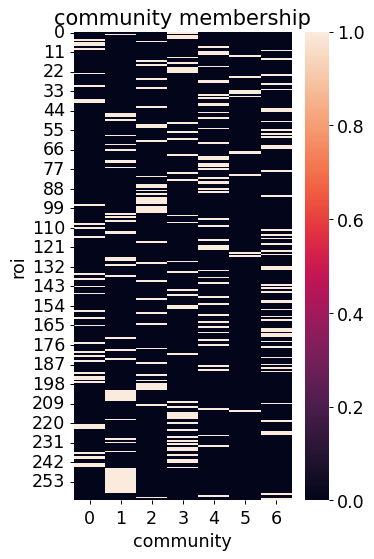

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(4, 6), dpi=90)
fig.tight_layout()
ax = axs
sns.heatmap(comms, ax=ax)
ax.set(xlabel='community', ylabel='roi', title='community membership')